In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# Carga de los dataframe

In [2]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

# Columnas

In [3]:
postulantes_educacion.columns

Index(['idpostulante', 'nombre', 'estado'], dtype='object')

In [4]:
postulantes_genero_y_edad.columns

Index(['idpostulante', 'fechanacimiento', 'sexo'], dtype='object')

In [5]:
vistas.columns

Index(['idAviso', 'timestamp', 'idpostulante'], dtype='object')

In [6]:
postulaciones.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion'], dtype='object')

In [7]:
avisos_online.columns

Index(['idaviso'], dtype='object')

In [8]:
avisos_detalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

# informacion de columnas

In [9]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [10]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [11]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [12]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [13]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [14]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


#  dataframe

In [15]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [16]:
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [17]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [18]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [19]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [20]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# tamanio de los dataframe

In [21]:
print(postulantes_educacion.shape)

print(postulantes_genero_y_edad.shape)

print(vistas.shape)

print(postulaciones.shape)

print(avisos_online.shape)

print(avisos_detalle.shape)

(298231, 3)
(200888, 3)
(961897, 3)
(3401623, 3)
(5028, 1)
(13534, 11)


# Cantidad por valores de columna

In [22]:
postulantes_educacion['nombre'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = postulantes_genero_y_edad['fechanacimiento'].apply(lambda x: x.split('-')[0])


Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [23]:


postulantes_educacion['estado'].value_counts()
#postulantes_genero_y_edad['anioNacimiento'] = po

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [24]:
#le sumo la xolumna edad por q viene la fecha de nacimiento y no la edad especifica
postulantes_genero_y_edad['edad'] =  2018 - postulantes_genero_y_edad[postulantes_genero_y_edad['fechanacimiento'].notnull()]['fechanacimiento'].apply(lambda x: x.split('-')[0]).apply(np.int64)
#aca no me dejaba convertir la col edad de float a int por los nan's asii q converti los nana a 0 y conveti toda la col en int
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0.0).apply(np.int64)
#saque los valores ridiculos
edades = postulantes_genero_y_edad[(postulantes_genero_y_edad['edad'] > 17) & (postulantes_genero_y_edad['edad'] < 100)]['edad'].value_counts().sort_index(ascending=False)


<IPython.core.display.Javascript object>


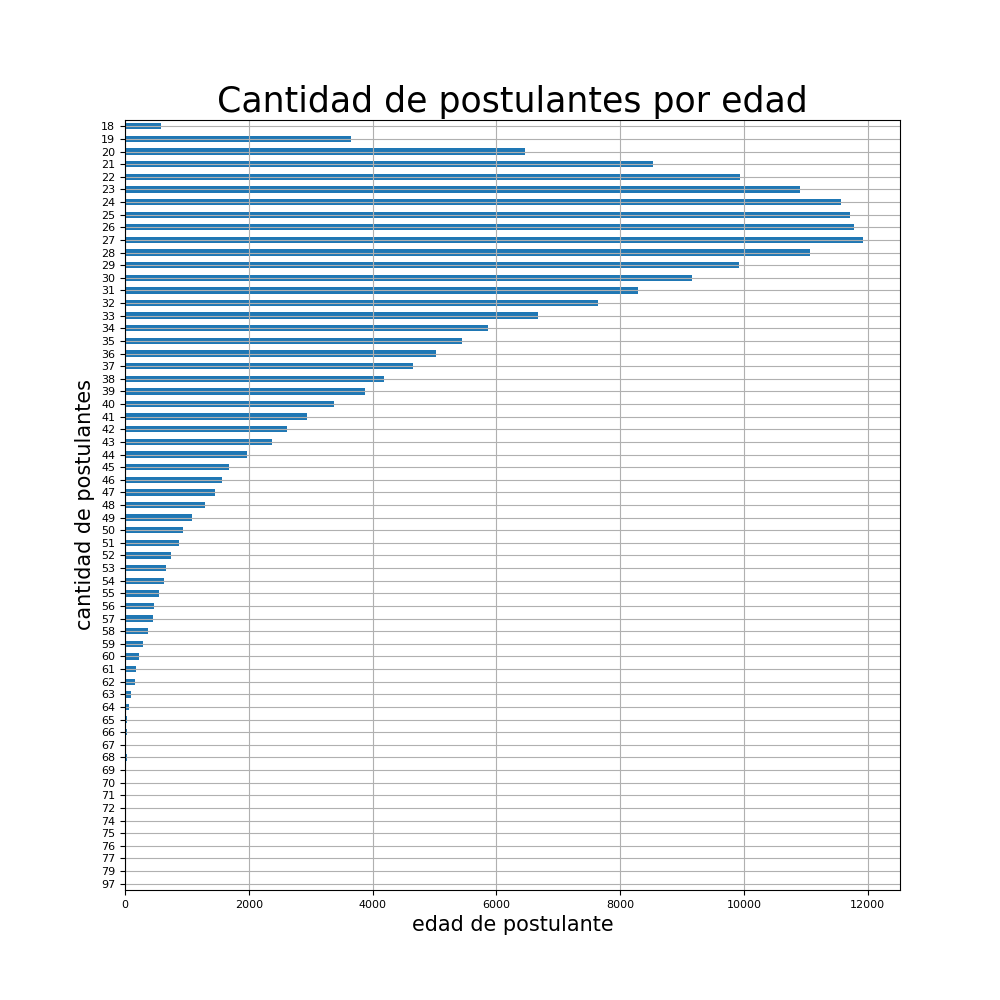

Text(0.5,1,'Cantidad de postulantes por edad')

In [28]:
%matplotlib notebook
edades.plot(kind='barh',figsize=(10,10),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('cantidad de postulantes',fontsize=15);
ax.set_xlabel('edad de postulante',fontsize=15)
ax.set_title('Cantidad de postulantes por edad',fontsize=25)

<IPython.core.display.Javascript object>


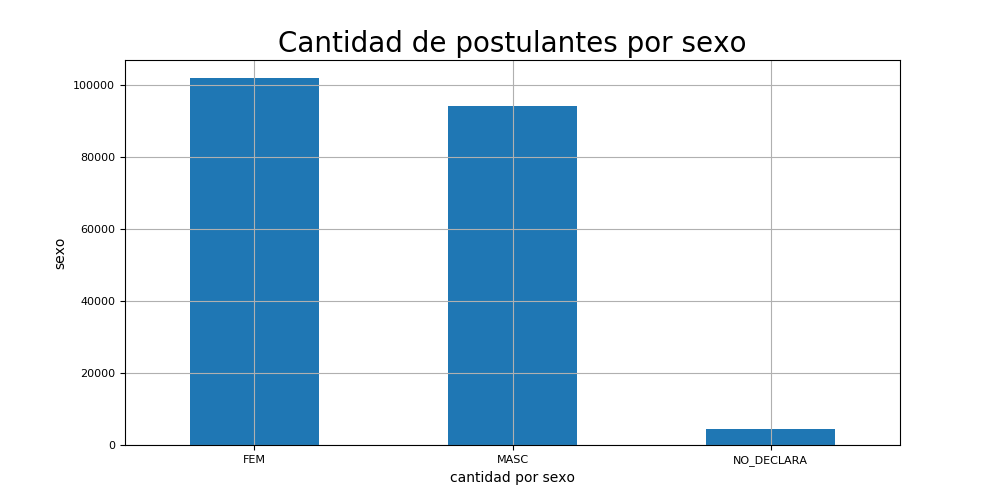

Text(0.5,1,'Cantidad de postulantes por sexo')

In [26]:
%matplotlib notebook

postulantes_genero_y_edad['sexo'].value_counts().plot(kind='bar',figsize=(10,5),rot=0,fontsize= 8,grid = True);
ax=plt.gca()
ax.set_ylabel('sexo',fontsize=10);
ax.set_xlabel('cantidad por sexo',fontsize=10)
ax.set_title('Cantidad de postulantes por sexo',fontsize=20)


In [27]:
postulantes_genero_y_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 4 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
edad               200888 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.1+ MB
